# Task 4: Working with an Image Tensor

In this notebook, we'll work with image data using NumPy tensor operations. We'll cover:

1. Loading and preparing image data
2. Basic image transformations
3. Grayscale conversion
4. Image augmentations

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set random seed for reproducibility
np.random.seed(42)

## 1. Loading and Preparing Image Data

First, we need to load an image and prepare it for processing:
1. We'll download a sample image if it doesn't exist already
2. Read it as a NumPy array using PIL.Image
3. Crop the top-left corner to shape (64, 64, 3)

Original image shape: (1024, 1024, 3)
Data type: uint8
Min value: 0, Max value: 255
Cropped image shape: (64, 64, 3)


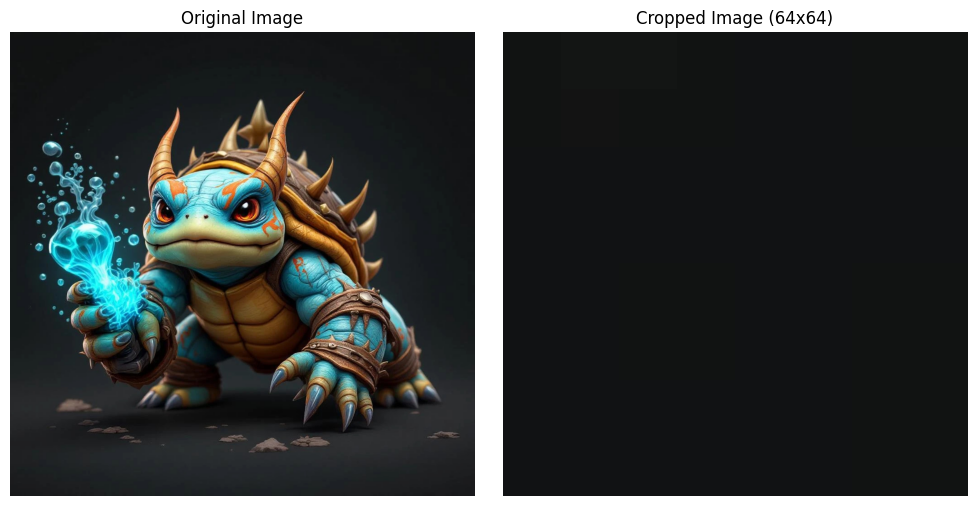

In [ ]:
# Create a directory for the image if it doesn't exist
image_dir = os.path.join(os.path.dirname(os.getcwd()), "images")
os.makedirs(image_dir, exist_ok=True)

# Path to the image file
image_path = os.path.join(image_dir, "sample_image.jpg")


# Load the image using PIL.Image
img = Image.open(image_path)
img_array = np.array(img)

# Print information about the loaded image
print(f"Original image shape: {img_array.shape}")
print(f"Data type: {img_array.dtype}")
print(f"Min value: {img_array.min()}, Max value: {img_array.max()}")

# Crop the top-left corner to shape (64, 64, 3)
cropped_img = img_array[128:192, 128:192, :]

print(f"Cropped image shape: {cropped_img.shape}")

# Display the original and cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_img)
plt.title('Cropped Image (64x64)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Indexing and Simple Transformations

Now let's perform some basic transformations on the image:
1. Print pixel values at the center (32, 32) (all 3 channels)
2. Extract the red channel (I[:, :, 0])
3. Invert the image: I_inv = 255 - I

Pixel values at center (32, 32): [17 18 20]
RGB values: R=17, G=18, B=20
Shape of the red channel: (64, 64)


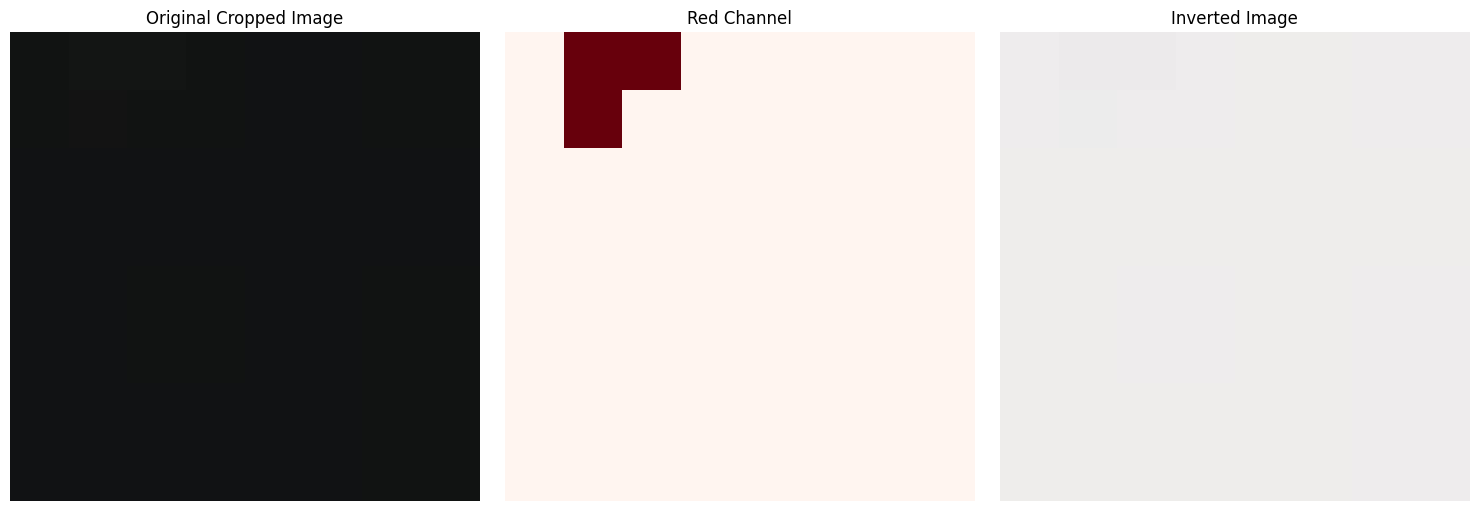

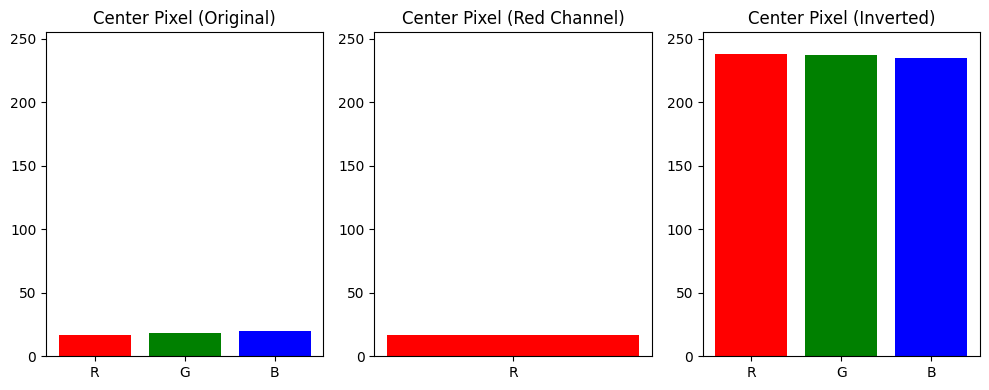

In [5]:
# 1. Print pixel values at the center (32, 32) (all 3 channels)
center_pixel = cropped_img[32, 32, :]
print(f"Pixel values at center (32, 32): {center_pixel}")
print(f"RGB values: R={center_pixel[0]}, G={center_pixel[1]}, B={center_pixel[2]}")

# 2. Extract the red channel
red_channel = cropped_img[:, :, 0]
print(f"Shape of the red channel: {red_channel.shape}")

# 3. Invert the image
inverted_img = 255 - cropped_img

# Display the results
plt.figure(figsize=(15, 5))

# Original cropped image
plt.subplot(1, 3, 1)
plt.imshow(cropped_img)
plt.title('Original Cropped Image')
plt.axis('off')

# Red channel (display as grayscale)
plt.subplot(1, 3, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Inverted image
plt.subplot(1, 3, 3)
plt.imshow(inverted_img)
plt.title('Inverted Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display the pixel values for the center location in all 3 images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(['R', 'G', 'B'], center_pixel, color=['red', 'green', 'blue'])
plt.title('Center Pixel (Original)')
plt.ylim(0, 255)

plt.subplot(1, 3, 2)
plt.bar(['R'], red_channel[32, 32], color='red')
plt.title('Center Pixel (Red Channel)')
plt.ylim(0, 255)

plt.subplot(1, 3, 3)
plt.bar(['R', 'G', 'B'], inverted_img[32, 32], color=['red', 'green', 'blue'])
plt.title('Center Pixel (Inverted)')
plt.ylim(0, 255)

plt.tight_layout()
plt.show()

## 3. Grayscale Conversion

Now let's convert the image to grayscale:
1. Using the formula: Gray = 0.299*R + 0.587*G + 0.114*B
2. Normalize to range [0, 1]
3. Compute the average brightness of the image

Grayscale image shape: (64, 64)
Grayscale data type: uint8
Grayscale range: [17, 20]
Normalized grayscale range: [0.0667, 0.0784]
Average brightness: 0.0684


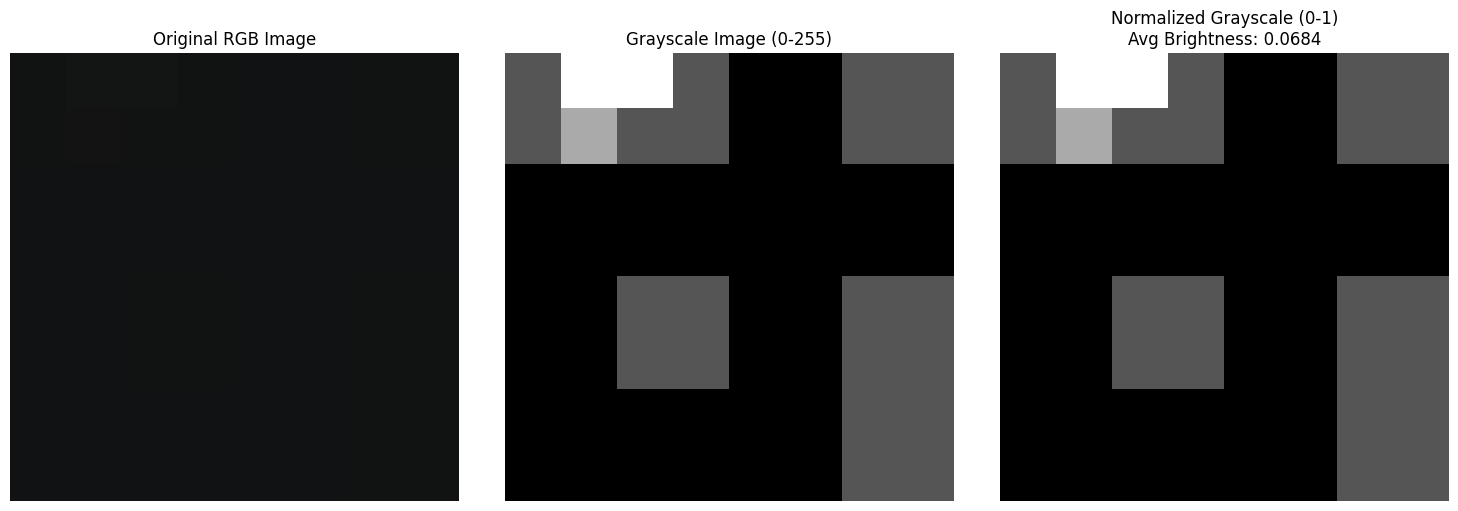

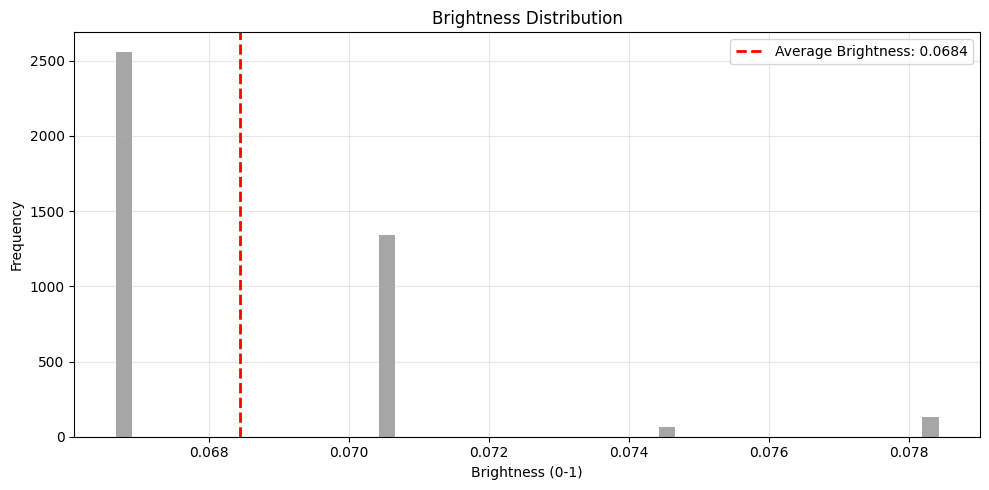

In [6]:
# 1. Convert to grayscale using the formula: Gray = 0.299*R + 0.587*G + 0.114*B
# Extract RGB channels
R = cropped_img[:, :, 0]
G = cropped_img[:, :, 1]
B = cropped_img[:, :, 2]

# Apply the grayscale formula
grayscale = 0.299*R + 0.587*G + 0.114*B

# Convert to integer (to match standard image formats)
grayscale = grayscale.astype(np.uint8)
print(f"Grayscale image shape: {grayscale.shape}")
print(f"Grayscale data type: {grayscale.dtype}")
print(f"Grayscale range: [{grayscale.min()}, {grayscale.max()}]")

# 2. Normalize to range [0, 1]
grayscale_norm = grayscale / 255.0
print(f"Normalized grayscale range: [{grayscale_norm.min():.4f}, {grayscale_norm.max():.4f}]")

# 3. Compute the average brightness of the image
avg_brightness = np.mean(grayscale_norm)
print(f"Average brightness: {avg_brightness:.4f}")

# Display the original and grayscale images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cropped_img)
plt.title('Original RGB Image')
plt.axis('off')

# Grayscale image (0-255)
plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale Image (0-255)')
plt.axis('off')

# Normalized grayscale (0-1)
plt.subplot(1, 3, 3)
plt.imshow(grayscale_norm, cmap='gray')
plt.title(f'Normalized Grayscale (0-1)\nAvg Brightness: {avg_brightness:.4f}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize the brightness distribution
plt.figure(figsize=(10, 5))
plt.hist(grayscale_norm.flatten(), bins=50, color='gray', alpha=0.7)
plt.axvline(avg_brightness, color='red', linestyle='dashed', linewidth=2, 
            label=f'Average Brightness: {avg_brightness:.4f}')
plt.title('Brightness Distribution')
plt.xlabel('Brightness (0-1)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Image Augmentations

Finally, let's apply some common image augmentation techniques:
1. Flip the image horizontally
2. Rotate the image by 90°
3. Resize to (32, 32, 3) by averaging 2×2 blocks

In [ ]:
# 1. Flip the image horizontally
flipped_img = np.fliplr(cropped_img)
print(f"Shape of flipped image: {flipped_img.shape}")

# 2. Rotate the image by 90° (counterclockwise)
rotated_img = np.rot90(cropped_img)
print(f"Shape of rotated image: {rotated_img.shape}")

# 3. Resize to (32, 32, 3) by averaging 2×2 blocks
# First reshape the image to group 2×2 blocks
reshaped = cropped_img.reshape(32, 2, 32, 2, 3)
# Then take the mean over the 2×2 blocks (axes 1 and 3)
resized_img = reshaped.mean(axis=(1, 3)).astype(np.uint8)
print(f"Shape of resized image: {resized_img.shape}")

# Display the augmented images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cropped_img)
plt.title('Original Image (64x64)')
plt.axis('off')

# Horizontally flipped image
plt.subplot(2, 2, 2)
plt.imshow(flipped_img)
plt.title('Horizontally Flipped')
plt.axis('off')

# Rotated image (90 degrees)
plt.subplot(2, 2, 3)
plt.imshow(rotated_img)
plt.title('Rotated 90°')
plt.axis('off')

# Resized image (32x32)
plt.subplot(2, 2, 4)
plt.imshow(resized_img)
plt.title('Resized to 32x32')
plt.axis('off')

plt.tight_layout()
plt.show()

# Let's also visualize the resizing process more explicitly
plt.figure(figsize=(12, 6))

# Original with grid overlay
plt.subplot(1, 2, 1)
plt.imshow(cropped_img)
plt.title('Original with 2x2 Grid')
plt.axis('off')

# Add grid lines to show the 2x2 blocks
for i in range(0, 64, 2):
    plt.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)
    plt.axvline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title('After Averaging 2x2 Blocks')
plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we worked with image data using NumPy tensor operations. We:

1. **Loaded and prepared an image** by reading it as a NumPy array and cropping it to a specific size
2. **Applied basic transformations** including extracting color channels and inverting the image
3. **Converted to grayscale** using a weighted formula and normalized the values
4. **Applied image augmentations** like flipping, rotating, and resizing

These operations demonstrate how NumPy can be used for image processing tasks without requiring specialized image processing libraries. The tensor representation of images (with shape height × width × channels) allows for efficient and flexible manipulation using NumPy's array operations.